In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import plot_3D, auxiliars, salve_doc, sphere, sample_random

## Criando o dado a priori

In [2]:
acquisition =  {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

In [3]:
coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

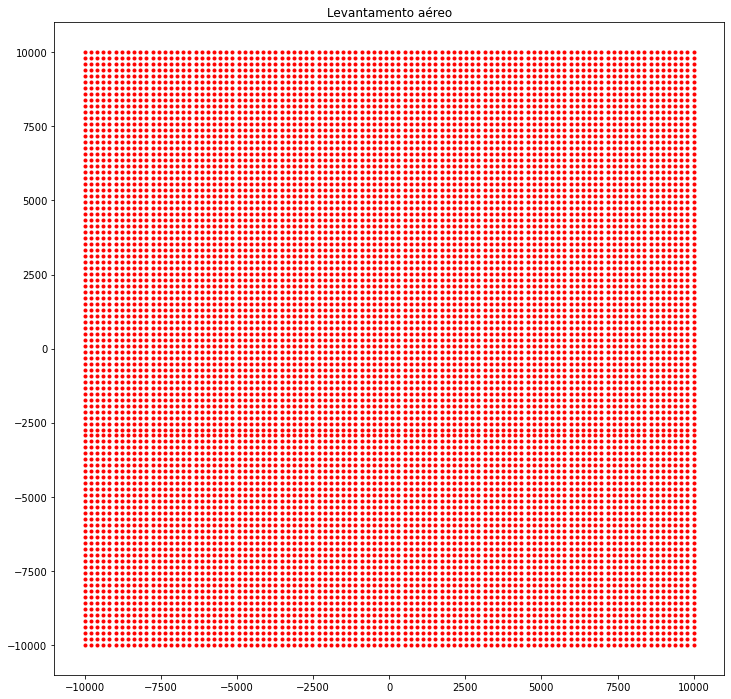

In [4]:
x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

In [5]:
balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)

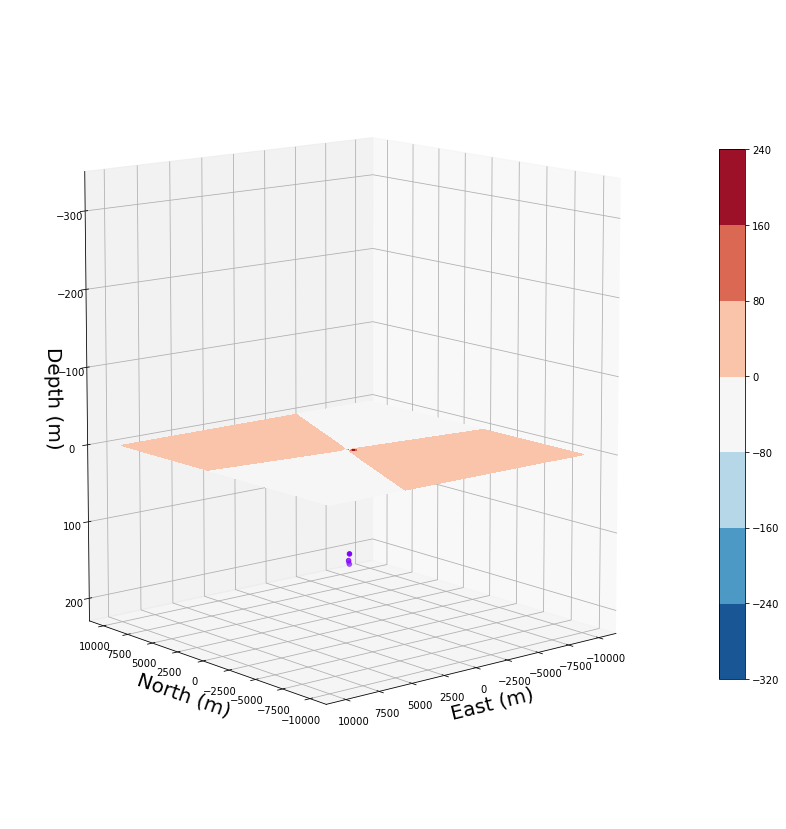

In [6]:
plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

## Criando a população:

In [7]:
def create_population(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo):
    coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n)
    incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo)
    dipolos_pop = []
    #raio = 100.0 # Valor do raio em metros, escolhido!!
    if n < 10:
        print(f'Por favor faça uma população com mais de 10 indivíduos')
    else:
        for i in range(n):
            dipolo = [coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]]
            dipolos_pop.append(dipolo)
    
    return dipolos_pop

In [8]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 100,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [9]:
pop = create_population(**population)

In [10]:
print(pop)

[[4979.53, -3753.34, 61.48, -76.25, 168.63, 1.72], [9510.5, -6062.49, 68.55, -34.18, -7.59, 1.72], [8431.74, 8180.15, 40.21, -14.61, 111.36, 1.72], [5172.03, 2387.95, 43.03, 0.51, 47.58, 1.72], [7739.03, -6944.41, 109.21, -13.7, 1.04, 1.72], [-4425.88, -5204.31, 76.54, -36.04, 116.89, 1.72], [9718.98, -4030.92, 96.01, -58.88, 87.02, 1.72], [-2603.52, 6779.6, 63.25, -35.74, 20.89, 1.72], [-6720.13, 644.04, 120.37, -14.52, 66.65, 1.72], [-7409.08, 9429.99, 2.59, -24.86, 121.48, 1.72], [-2683.81, -7001.7, 20.35, -0.63, 97.73, 1.72], [-8500.6, -3975.1, 0.66, -49.12, 26.68, 1.72], [1963.65, -5700.62, 76.12, -56.85, 55.32, 1.72], [7083.52, 7188.1, 114.77, -36.35, -11.26, 1.72], [470.44, 4368.13, 70.32, 1.28, 9.8, 1.72], [-5290.8, 6725.31, 130.4, -23.42, 153.67, 1.72], [9518.47, -6039.51, 55.41, 7.31, 32.37, 1.72], [370.37, 9953.5, 85.33, -36.41, 38.8, 1.72], [-5380.14, -1880.58, 98.47, -25.49, 130.93, 1.72], [8859.85, 6687.13, 53.27, 14.11, 99.51, 1.72], [6232.63, 3792.19, 89.5, -34.82, 34.1

## Calculando o Fitness

In [12]:
def fit_value(X, Y, Z, pop, tfa_n_bolinhas):
    list_sphere = []
    list_mag = []
    list_incl = []
    list_decl = []
    fit_cada = []

    for i in range(len(pop)):
        list_sphere.append((pop[i][0], pop[i][1], pop[i][2], 100.0))
        list_mag.append(pop[i][5])
        list_incl.append(pop[i][3])
        list_decl.append((pop[i][4]))
    
        tfa_cada = sphere.sphere_tfa(X,Y,Z,list_sphere[i],list_mag[i],30.0,50.0,list_incl[i],list_decl[i])
    
        fit = sample_random.f_difference(tfa_n_bolinhas, tfa_cada)
        fit_cada.append(float("{0:.2f}".format((fit))))
    
    return fit_cada

fit_cada = fit_value(X, Y, Z, pop, tfa_n_bolinhas)
print(fit_cada)

[111.07, 103.65, 117.84, 103.95, 102.48, 103.5, 102.24, 105.48, 101.96, 108.05, 139.1, 114.13, 107.92, 101.46, 106.63, 101.01, 106.22, 103.32, 101.63, 108.33, 102.79, 104.4, 101.49, 101.78, 102.18, 101.73, 115.42, 107.36, 117.95, 103.6, 102.18, 102.46, 102.33, 100.87, 111.41, 107.3, 101.84, 102.05, 106.08, 144.47, 110.44, 101.18, 155.79, 104.35, 102.08, 103.11, 130.26, 101.38, 105.6, 104.12, 111.08, 105.65, 136.1, 108.52, 102.85, 123.59, 132.04, 101.63, 103.16, 103.3, 106.59, 104.42, 110.07, 114.65, 128.38, 109.22, 102.11, 109.12, 106.28, 102.67, 109.14, 101.74, 107.57, 112.95, 110.13, 103.58, 103.52, 101.59, 102.82, 105.74, 102.34, 98.42, 101.28, 101.76, 103.69, 117.34, 104.53, 104.54, 105.61, 103.85, 106.14, 102.63, 145.38, 103.63, 103.71, 125.59, 115.62, 113.9, 120.58, 104.28]


## Método de seleção - Torneio

In [13]:
def tournament_selection(pop, fit_cada):
    pop_1 = pop.copy()
    chosen = []
    capture_select = []
    if int(0.2*len(pop)) < 2:
        print(f'Por favor faça uma população com mais de 10 indivíduos')
    else:
        for i in range(int(0.2*len(pop))):
#---------------------------- Escolhidos para o torneio ---------------------------------#
            index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2*len(pop)))))        
            capture = [index_select[i], fit_cada[index_select[i]]]
            capture_select.append(capture)
#---------------------------- Vencedor do torneio ---------------------------------#
            escolhido = pop_1[min(capture_select)[0]]
#------------------ Retirada do vencedor da população artificial ------------------------#
            del(pop_1[min(capture_select)[0]])
#---------------------------- Vencedores do torneio ---------------------------------#
            chosen.append(escolhido)
    
    return chosen

pais_torneio = tournament_selection(pop, fit_cada)

In [14]:
print(pais_torneio)
print(len(pais_torneio))

[[3502.91, -4196.34, 49.53, -15.98, 105.09, 1.72], [-2603.52, 6779.6, 63.25, -35.74, 20.89, 1.72], [-6720.13, 644.04, 120.37, -14.52, 66.65, 1.72], [-7409.08, 9429.99, 2.59, -24.86, 121.48, 1.72], [-2683.81, -7001.7, 20.35, -0.63, 97.73, 1.72], [-8500.6, -3975.1, 0.66, -49.12, 26.68, 1.72], [1963.65, -5700.62, 76.12, -56.85, 55.32, 1.72], [7083.52, 7188.1, 114.77, -36.35, -11.26, 1.72], [470.44, 4368.13, 70.32, 1.28, 9.8, 1.72], [-5290.8, 6725.31, 130.4, -23.42, 153.67, 1.72], [9518.47, -6039.51, 55.41, 7.31, 32.37, 1.72], [370.37, 9953.5, 85.33, -36.41, 38.8, 1.72], [-5380.14, -1880.58, 98.47, -25.49, 130.93, 1.72], [8859.85, 6687.13, 53.27, 14.11, 99.51, 1.72], [6232.63, 3792.19, 89.5, -34.82, 34.13, 1.72], [-9150.44, -123.63, 77.37, -25.02, 135.63, 1.72], [5172.03, 2387.95, 43.03, 0.51, 47.58, 1.72], [7739.03, -6944.41, 109.21, -13.7, 1.04, 1.72], [-4425.88, -5204.31, 76.54, -36.04, 116.89, 1.72], [9718.98, -4030.92, 96.01, -58.88, 87.02, 1.72]]
20


## Crossover 

In [15]:
def crossover(pais_torneio):
    filhos = []
    n_filhos = int(len(pais_torneio)/2)
    pai = np.array(pais_torneio[0:n_filhos])
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    prob_pai = random.random()
    prob_mae = random.random()
    den = prob_mae + prob_pai

    for j in range(n_filhos):
        num = (prob_pai*pai[j] + prob_mae*mae[j])
        filho = num/den
        filho = list(filho)
        filhos.append(filho)
    
    
    return filhos

filho = crossover(pais_torneio)
print(filho)
print(len(filho))

[[5423.859395993267, -4784.919666433866, 51.40766100719474, -8.542801894971841, 81.86831489061196, 1.72], [-1653.8673992029974, 7793.121814750918, 70.30080868007822, -35.95395116918716, 26.60920214946562, 1.72], [-6292.230854926721, -162.1471653034002, 113.37667073850938, -18.0230512328106, 87.17653903783642, 1.72], [-2213.920903098507, 8554.112232960173, 18.77364963344041, -12.415705875785857, 114.46431763128086, 1.72], [163.47770595093525, -3554.885991675294, 42.4316766407341, -11.54789623061025, 77.4206054323834, 1.72], [-8708.113474305346, -2745.2096871802146, 25.15581222141306, -41.42414451132767, 61.4710147506577, 1.72], [2988.182316711475, -3117.6961066385734, 65.5533668829806, -38.53322527675331, 52.84838500073345, 1.72], [7292.844075990855, 2675.1641223146626, 112.99452462584985, -29.117173161061064, -7.33223972984773, 1.72], [-1093.1023712156066, 1311.3617463076102, 72.30623324230464, -10.637399453827863, 43.997060758585896, 1.72], [-497.7254026238922, 3290.521963364232, 119.

## Mutação

In [16]:
'''sim sim... oq vc colocou é aleatório pra escolher o individuo pra
sofrer a mutação e dps escolher um parâmetro aleatório pra mutar dentro
desse max e min'''

#coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
filhos_mut = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }


In [17]:
def mutacao(filho, xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo):
    
    prob_mut = 0.01
    for ind, dipolo in enumerate(filho):
        rand_mut = random.random()
        if prob_mut > rand_mut:
            n_select = random.randint(0, (len(filho)-1))
            param_select = random.randint(0, (len(filho[0])))
            if param_select <= 2:
                coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n)
                if param_select == 0:
                    filho[n_select][param_select] = float(coodX[0])
                elif param_select == 1:
                    filho[n_select][param_select] = float(coodY[0])
                elif param_select == 2:
                    filho[n_select][param_select] = float(coodZ[0])
            else:
                incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo)
                if param_select == 3:
                    filho[n_select][param_select] = float(incl[0])
                elif param_select == 4:
                    filho[n_select][param_select] = float(decl[0])
                elif param_select == 5:
                    filho[n_select][param_select] = float(mag[0])
    
    return filho
                
filhos = mutacao(filho, **filhos_mut)      
print(filhos, len(filhos))

[[5423.859395993267, -4784.919666433866, 51.40766100719474, -8.542801894971841, 81.86831489061196, 1.72], [-1653.8673992029974, 7793.121814750918, 70.30080868007822, -35.95395116918716, 26.60920214946562, 1.72], [-6292.230854926721, -162.1471653034002, 113.37667073850938, -18.0230512328106, 87.17653903783642, 1.72], [-2213.920903098507, 8554.112232960173, 18.77364963344041, -12.415705875785857, 114.46431763128086, 1.72], [163.47770595093525, -3554.885991675294, 42.4316766407341, -11.54789623061025, 77.4206054323834, 1.72], [-8708.113474305346, -2745.2096871802146, 25.15581222141306, -41.42414451132767, 61.4710147506577, 1.72], [2988.182316711475, -3117.6961066385734, 65.5533668829806, -38.53322527675331, 52.84838500073345, 1.72], [7292.844075990855, 2675.1641223146626, 112.99452462584985, -29.117173161061064, -7.33223972984773, 1.72], [-1093.1023712156066, 1311.3617463076102, 72.30623324230464, -10.637399453827863, 43.997060758585896, 1.72], [-497.7254026238922, 3290.521963364232, 119.

## Calculando o fitness dos filhos

In [19]:
fit_filhos = fit_value(X, Y, Z, filhos, tfa_n_bolinhas)
print(fit_filhos)

[111.18, 105.18, 102.07, 118.74, 115.47, 121.77, 108.89, 101.31, 106.69, 101.37]


## Reinserção dos filhos na população - Elitismo

In [20]:
def elitismo(pop, filhos, fit_cada):
    pop_fit = []
    n_fica = (len(pop) - len(filhos))

    for i in range(len(pop)):
        fit_pop = [pop[i][0], pop[i][1], pop[i][2], pop[i][3], pop[i][4], pop[i][5], fit_cada[i]]
        pop_fit.append(fit_pop)
        sort_pop = sorted(pop_fit, key = lambda pop_fit : pop_fit[:][6])

    for i in range(len(sort_pop)):
        del(sort_pop[i][6])

    del(sort_pop[n_fica : len(pop)])
    for i in range(len(filhos)):
        new_individuo = filhos[i]
        sort_pop.append(new_individuo)
    
    return sort_pop


In [21]:
'''
population = create_population()
print(population[1][4])
print("População Inicial: {}".format(population))
print("\n")
for i in range(1000):
    population = selection_and_crossover(population)
    population = mutation(population)
print("População Final: {}".format(population))
'''



'\npopulation = create_population()\nprint(population[1][4])\nprint("População Inicial: {}".format(population))\nprint("\n")\nfor i in range(1000):\n    population = selection_and_crossover(population)\n    population = mutation(population)\nprint("População Final: {}".format(population))\n'

In [22]:
'''populacao = create_population(**population)
print("População Inicial: {}".format(populacao))
print("\n")
for i in range(10000):
    fit_ = fit_value(X, Y, Z, populacao)
    pais_ = tournament_selection(populacao, fit_)
    filho_ = crossover(pais_)
    filho_ = mutacao(filho_, **filhos_mut)
    populacao = elitismo(populacao, filho_, fit_)

last_fit = fit_value(X, Y, Z, populacao)
print(f'Última geração tem como o menor fitness: {min(last_fit)}')
''' 

'populacao = create_population(**population)\nprint("População Inicial: {}".format(populacao))\nprint("\n")\nfor i in range(10000):\n    fit_ = fit_value(X, Y, Z, populacao)\n    pais_ = tournament_selection(populacao, fit_)\n    filho_ = crossover(pais_)\n    filho_ = mutacao(filho_, **filhos_mut)\n    populacao = elitismo(populacao, filho_, fit_)\n\nlast_fit = fit_value(X, Y, Z, populacao)\nprint(f\'Última geração tem como o menor fitness: {min(last_fit)}\')\n'